<a href="https://colab.research.google.com/github/AnnieCRY/DS5230-project/blob/master/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### original data available [here](https://www.kaggle.com/chrisfilo/to-bee-or-no-to-bee/data), and downloaded into google drive already

### if you haven't download the data, please download first and save in your google drive under folder named 5230Project

In [ ]:
# test

In [1]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# move zip file to colab vm
! cp gdrive/My\ Drive/5230Project/501224_928375_bundle_archive.zip ./

In [3]:
%%capture
# unzip the file
! unzip 501224_928375_bundle_archive.zip

! mkdir labFiles
! mkdir audioFiles
! mv *.mp3 audioFiles/
! mv *.wav audioFiles/
! mv *.lab labFiles/

In [4]:
# download the supporting files from github
! rm -rf Audio_based_identification_beehive_states/
! git clone https://github.com/Tonyz4516/Audio_based_identification_beehive_states.git

Cloning into 'Audio_based_identification_beehive_states'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 56.94 KiB | 3.35 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [5]:
! mv Audio_based_identification_beehive_states/Bee_NotBee_classification/* ./

In [6]:
%%capture
! pip install muda

In [7]:
import os
#from info import i, printb, printr, printp, print
from utils import load_audioFiles_saves_segments, write_Statelabels_from_beeNotBeelabels, get_uniqueHives_names_from_File, split_samples_byHive, get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary, write_sample_ids_perHive, split_samples_ramdom

In [8]:
block_size=5 # blocks of 5 seconds
thresholds=[0, 5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path_audioFiles="audioFiles/"  # path to audio files
annotations_path="labFiles/" # path to .lab files
path_save_audio_labels='dataset_BeeNoBee_'+str(block_size)+'sec/'  # path where to save audio segments and labels files.

In [9]:
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels)

In [ ]:
# segments audio files, assigns label BeeNotBee to each block, writes labels to csv , saves segmened blocks in wav.
# independently of flag save_audioSegments, if .wav with same name already exists it won't save again.
# new labels are just appended to existing labels file, if purpose is to redo the whole file delete before running.
import random
random.seed(10)
filenames = random.sample(os.listdir("audioFiles"), 5)
load_audioFiles_saves_segments( filenames, path_audioFiles, path_save_audio_labels, block_size , thresholds, annotations_path, read_beeNotBee_annotations='yes', save_audioSegments='yes')

In [12]:
path_beeNotbee_labels=path_save_audio_labels + 'labels_BeeNotBee_th' + str(thresholds[0])+'.csv' 
# reads labels beeNotBee files and creates corresponding states label file.
write_Statelabels_from_beeNotBeelabels(path_save_audio_labels, path_beeNotbee_labels, states=['active','missing queen','swarm' ])

In [13]:
import utils
sample_ids = utils.get_list_samples_names(path_save_audio_labels) # get sample ids from audio segments folder.

In [14]:
# split data by Hive 
hives=write_sample_ids_perHive(sample_ids , path_save_audio_labels)  # retrieves unique hives names and also writes these to a file
#hives=get_uniqueHives_names_from_File(path_save_audio_labels)
for i in range(3):
    split_dict = split_samples_byHive(0.1, 0.5, hives, path_save_audio_labels+'split_byHive_'+str(i))

[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for testing: ['Hive3']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for training: ['CF003']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for validation: []
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for testing: ['Hive3']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for training: ['CF003']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for validation: []
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for testing: ['CF003']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for training: ['Hive3']
[2020-07-26 17:34:31 RAM8.2% 0.28GB] hives for validation: []


In [15]:
#split data randomly
for i in range(3):
    split_dict = split_samples_ramdom(0.1,0.5,path_save_audio_labels, path_save_audio_labels+'split_random_'+str(i))

[2020-07-26 17:34:32 RAM8.2% 0.28GB] samples for testing: ['Hive3_15_07_2017_NO_QueenBee_H3_audio___07_00_00__segment110.wav', 'Hive3_20_07_2017_QueenBee_H3_audio___06_10_00__segment35.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00__segment57.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_40_00__segment40.wav', 'Hive3_20_07_2017_QueenBee_H3_audio___06_10_00__segment39.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00__segment28.wav', 'Hive3_15_07_2017_NO_QueenBee_H3_audio___07_00_00__segment19.wav', 'CF003 - Active - Day - (216)__segment54.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00__segment0.wav', 'Hive3_15_07_2017_NO_QueenBee_H3_audio___07_00_00__segment27.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_40_00__segment48.wav', 'Hive3_20_07_2017_QueenBee_H3_audio___06_10_00__segment41.wav', 'Hive3_15_07_2017_NO_QueenBee_H3_audio___07_00_00__segment46.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00__segment91.wav', 'Hive3_12_07_2017_NO_QueenBee_H3

In [ ]:
# zip processed data
# !zip -r dataset_BeeNoBee_60sec.zip dataset_BeeNoBee_60sec/

In [17]:
# save processed data to google drive
! cp -r dataset_BeeNoBee_5sec/ gdrive/My\ Drive/5230Project/processed_data/


## looking into .lab files

In [ ]:
with open('/content/labFiles/CF003 - Active - Day - (214).lab','r') as f:
    lines = f.read().split('\n')
    for i in lines:
      print(i)

CF003 - Active - Day - (214)
0	7.3	bee
7.31	7.87	nobee
7.88	10.37	bee
10.38	10.63	nobee
10.64	15.64	bee
15.65	17.32	nobee
17.33	20.93	bee
20.94	28.96	nobee
28.97	33.01	bee
33.02	36.43	nobee
36.44	37.65	bee
37.66	44.42	nobee
44.43	49.98	bee
49.99	58.07	nobee
58.08	66.38	bee
66.39	74.95	nobee
74.96	77.5	bee
77.51	89.84	nobee
89.85	90.41	bee
90.42	217.94	nobee
217.95	218.37	bee
218.38	296.66	nobee
296.67	296.9	bee
296.91	300.0	bee
.



## Sample 5 sec audio

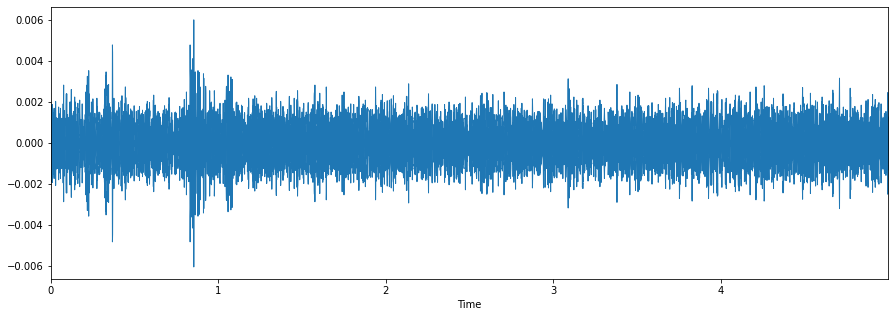

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd 
# Use one audio file in previous parts again
fname = '/content/dataset_BeeNoBee_5sec/CF003 - Active - Day - (215)__segment0.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# 
ipd.Audio(data, rate=sampling_rate)

# Explore the labels

In [ ]:
import os
import glob
os.chdir(path_save_audio_labels)
result = glob.glob('*.{}'.format('csv'))
os.chdir('../')
print(result)

['state_labels.csv', 'labels_BeeNotBee_th5.csv', 'labels_BeeNotBee_th0.csv']


## State labels

In [16]:
import pandas as pd
state_labels = pd.read_csv(path_save_audio_labels+"state_labels.csv") 
state_labels.head()

,sample_name,label
0,CF003 - Active - Day - (216)__segment0,active
1,CF003 - Active - Day - (216)__segment1,active
2,CF003 - Active - Day - (216)__segment2,active
3,CF003 - Active - Day - (216)__segment3,active
4,CF003 - Active - Day - (216)__segment4,active


## BeeNotBee labels for threshold 5

In [64]:
labels_BeeNotBee_th5 = pd.read_csv(path_save_audio_labels+"labels_BeeNotBee_th5.csv") 
labels_BeeNotBee_th5.head()

,sample_name,segment_start,segment_finish,label_strength,label
0,CF003 - Active - Day - (216)__segment0,0,5,0.0,bee
1,CF003 - Active - Day - (216)__segment1,5,10,0.0,bee
2,CF003 - Active - Day - (216)__segment2,10,15,0.0,bee
3,CF003 - Active - Day - (216)__segment3,15,20,0.0,bee
4,CF003 - Active - Day - (216)__segment4,20,25,0.0,bee


In [70]:
def add_new_labels(df):
  labels_l=[]
  for x in df['label_strength']:
    if x>0.95:
      labels_l.append('nobee') 
    elif x==0:
      labels_l.append('bee') 
    else:
      labels_l.append('unknown') 
  df['new_label']=labels_l
  return df
labels_BeeNotBee_th5=add_new_labels(labels_BeeNotBee_th5)

## BeeNotBee labels for threshold 0

In [61]:
labels_BeeNotBee_th0 = pd.read_csv(path_save_audio_labels+"labels_BeeNotBee_th0.csv") 
# labels_BeeNotBee_th0.equals(labels_BeeNotBee_th5)

In [71]:
labels_BeeNotBee_th0=add_new_labels(labels_BeeNotBee_th0)
labels_BeeNotBee_th0.head()

,sample_name,segment_start,segment_finish,label_strength,label,new_label
0,CF003 - Active - Day - (216)__segment0,0,5,0.000,bee,bee
1,CF003 - Active - Day - (216)__segment1,5,10,0.056,nobee,unknown
2,CF003 - Active - Day - (216)__segment2,10,15,0.000,bee,bee
3,CF003 - Active - Day - (216)__segment3,15,20,0.000,bee,bee
4,CF003 - Active - Day - (216)__segment4,20,25,0.000,bee,bee


### Bee vs noBee (threshold=0)

In [72]:
labels_bee = labels_BeeNotBee_th0[labels_BeeNotBee_th0['new_label']=='bee']
labels_nobee = labels_BeeNotBee_th0[labels_BeeNotBee_th0['new_label']=='nobee']

In [73]:
print(str(len(labels_bee)) +' segments are labelled as bee' )
print(str(len(labels_nobee)) +' segments are labelled as nobee' )

971 segments are labelled as bee
387 segments are labelled as nobee


In [74]:
# threshold=5
labels_bee5 = labels_BeeNotBee_th5[labels_BeeNotBee_th5['new_label']=='bee']
labels_nobee5 = labels_BeeNotBee_th5[labels_BeeNotBee_th5['new_label']=='nobee']
print(str(len(labels_bee5)) +' segments are labelled as bee' )
print(str(len(labels_nobee5)) +' segments are labelled as nobee' )

1211 segments are labelled as bee
386 segments are labelled as nobee


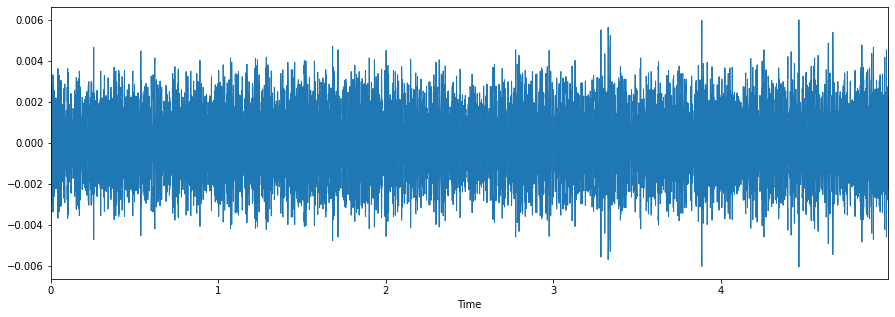

In [75]:
fn_bee = path_save_audio_labels+labels_bee5['sample_name'].iloc[0]+'.wav'
data, sampling_rate = librosa.load(fn_bee)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(data, rate=sampling_rate)

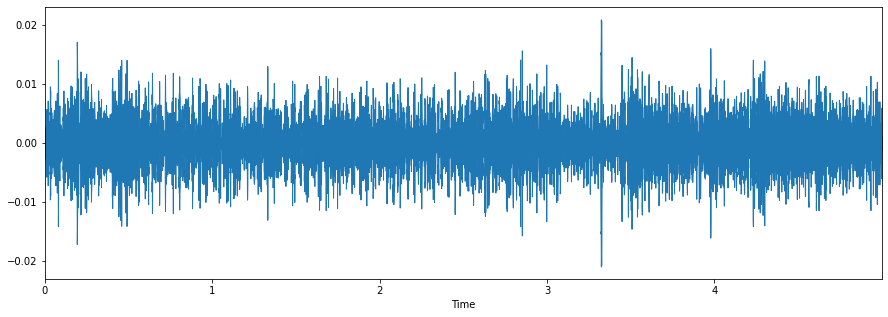

In [76]:
fn_bee = path_save_audio_labels+labels_bee['sample_name'].iloc[491]+'.wav'
data, sampling_rate = librosa.load(fn_bee)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(data, rate=sampling_rate)

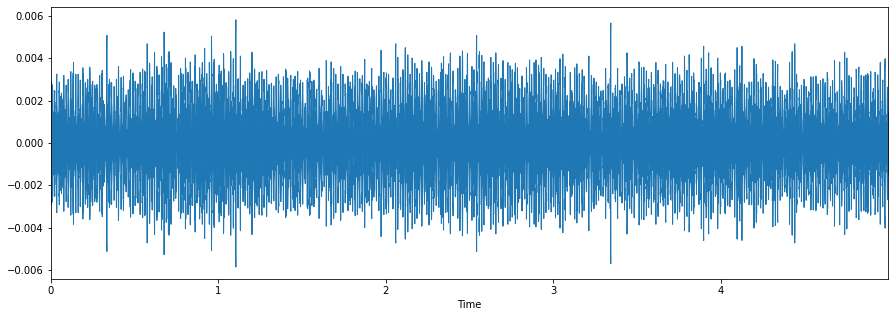

In [77]:
fn_nobee = path_save_audio_labels+labels_nobee5['sample_name'].iloc[0]+'.wav'
data, sampling_rate = librosa.load(fn_nobee)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(data, rate=sampling_rate)

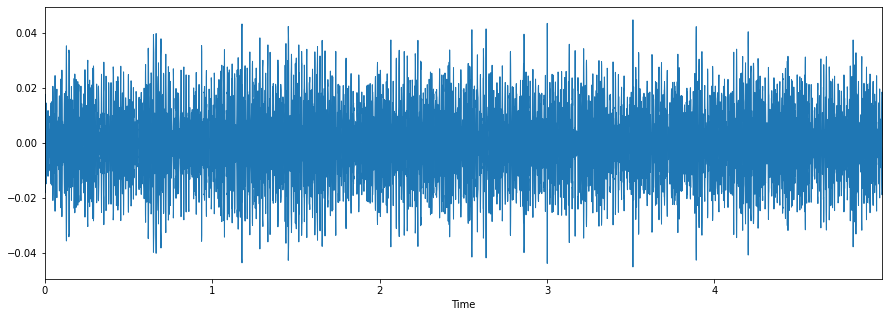

In [78]:
fn_nobee = path_save_audio_labels+labels_nobee['sample_name'].iloc[16]+'.wav'
data, sampling_rate = librosa.load(fn_nobee)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(data, rate=sampling_rate)

Labels are assigned by this function

`def read_beeNotBee_annotations_saves_labels(audiofilename, block_name,  blockStart, blockfinish, annotations_path, threshold=0):`
    
    
    ## function: reads corresponding annotation file (.lab) and assigns a label to one block/sample. Appends label into csv file.
    ##
    ## inputs: 
    ## audiofilename = name of the audio file (no path), block_name = name of the sample/segment,  blockStart = time point in seconds where block starts, blockfinish = time point in seconds where block ends, annotations_path = path to annotations folder (where .lab files are), threshold = value tor threshold. 
    ##
    ## outputs:
    ## label_th= 2 element list, 
    [0] = a label (bee / nobee) for the block and threshold considered; 
    [1] = label strength, value that reflects the proportion of nobee interval in respect to the whole block.
    
    
    # thershold gives the minimum duration of the no bee intervals we want to consider.
    # trheshold=0 uses every event as notBee whatever the duration
    # thershold=0.5 disregards intervals with less than half a second duration.
  